Data Set Information:

The dataset consists of feature vectors belonging to 12,330 sessions.
The dataset was formed so that each session
would belong to a different user in a 1-year period to avoid
any tendency to a specific campaign, special day, user
profile, or period.


Attribute Information:

The dataset consists of 10 numerical and 8 categorical attributes.
The 'Revenue' attribute can be used as the class label.

"Administrative", "Administrative Duration", "Informational", "Informational Duration", "Product Related" and "Product Related Duration" represent the number of different types of pages visited by the visitor in that session and total time spent in each of these page categories. The values of these features are derived from the URL information of the pages visited by the user and updated in real time when a user takes an action, e.g. moving from one page to another. The "Bounce Rate", "Exit Rate" and "Page Value" features represent the metrics measured by "Google Analytics" for each page in the e-commerce site. The value of "Bounce Rate" feature for a web page refers to the percentage of visitors who enter the site from that page and then leave ("bounce") without triggering any other requests to the analytics server during that session. The value of "Exit Rate" feature for a specific web page is calculated as for all pageviews to the page, the percentage that were the last in the session. The "Page Value" feature represents the average value for a web page that a user visited before completing an e-commerce transaction. The "Special Day" feature indicates the closeness of the site visiting time to a specific special day (e.g. Mother’s Day, Valentine's Day) in which the sessions are more likely to be finalized with transaction. The value of this attribute is determined by considering the dynamics of e-commerce such as the duration between the order date and delivery date. For example, for Valentina’s day, this value takes a nonzero value between February 2 and February 12, zero before and after this date unless it is close to another special day, and its maximum value of 1 on February 8. The dataset also includes operating system, browser, region, traffic type, visitor type as returning or new visitor, a Boolean value indicating whether the date of the visit is weekend, and month of the year.



# Loading Necessary Libraries 

In [1]:
import pandas as pd
import numpy as np
df=pd.read_csv('./online_shoppers_intention.csv')
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
import plotly.graph_objs as go
import warnings
warnings.filterwarnings("ignore")
import xgboost as xgb
from sklearn.linear_model import LinearRegression

In [2]:
df

Administrative  Administrative_Duration  Informational  \
0                   0                      0.0              0   
1                   0                      0.0              0   
2                   0                      0.0              0   
3                   0                      0.0              0   
4                   0                      0.0              0   
...               ...                      ...            ...   
12325               3                    145.0              0   
12326               0                      0.0              0   
12327               0                      0.0              0   
12328               4                     75.0              0   
12329               0                      0.0              0   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                         0.0               1                 0.000000   
1                         0.0               2                64.000000   
2                         0.0               1                 0.000000   
3                         0.0               2                 2.666667   
4                         0.0              10               627.500000   
...                       ...             ...                      ...   
12325                     0.0              53              1783.791667   
12326                     0.0               5               465.750000   
12327                     0.0               6               184.250000   
12328                     0.0              15               346.000000   
12329                     0.0               3                21.250000   

       BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
0         0.200000   0.200000    0.000000         0.0   Feb                 1   
1         0.000000   0.100000    0.000000         0.0   Feb                 2   
2         0.200000   0.200000    0.000000         0.0   Feb                 4   
3         0.050000   0.140000    0.000000         0.0   Feb                 3   
4         0.020000   0.050000    0.000000         0.0   Feb                 3   
...            ...        ...         ...         ...   ...               ...   
12325     0.007143   0.029031   12.241717         0.0   Dec                 4   
12326     0.000000   0.021333    0.000000         0.0   Nov                 3   
12327     0.083333   0.086667    0.000000         0.0   Nov                 3   
12328     0.000000   0.021053    0.000000         0.0   Nov                 2   
12329     0.000000   0.066667    0.000000         0.0   Nov                 3   

       Browser  Region  TrafficType        VisitorType  Weekend  Revenue  
0            1       1            1  Returning_Visitor    False    False  
1            2       1            2  Returning_Visitor    False    False  
2            1       9            3  Returning_Visitor    False    False  
3            2       2            4  Returning_Visitor    False    False  
4            3       1            4  Returning_Visitor     True    False  
...        ...     ...          ...                ...      ...      ...  
12325        6       1            1  Returning_Visitor     True    False  
12326        2       1            8  Returning_Visitor     True    False  
12327        2       1           13  Returning_Visitor     True    False  
12328        2       3           11  Returning_Visitor    False    False  
12329        2       1            2        New_Visitor     True    False  

[12330 rows x 18 columns]

In [3]:
df.head()

Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0              0   
4               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                64.000000   
2                     0.0               1                 0.000000   
3                     0.0               2                 2.666667   
4                     0.0              10               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
0         0.20       0.20         0.0         0.0   Feb                 1   
1         0.00       0.10         0.0         0.0   Feb                 2   
2         0.20       0.20         0.0         0.0   Feb                 4   
3         0.05       0.14         0.0         0.0   Feb                 3   
4         0.02       0.05         0.0         0.0   Feb                 3   

   Browser  Region  TrafficType        VisitorType  Weekend  Revenue  
0        1       1            1  Returning_Visitor    False    False  
1        2       1            2  Returning_Visitor    False    False  
2        1       9            3  Returning_Visitor    False    False  
3        2       2            4  Returning_Visitor    False    False  
4        3       1            4  Returning_Visitor     True    False

In [4]:
df.tail()

Administrative  Administrative_Duration  Informational  \
12325               3                    145.0              0   
12326               0                      0.0              0   
12327               0                      0.0              0   
12328               4                     75.0              0   
12329               0                      0.0              0   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
12325                     0.0              53              1783.791667   
12326                     0.0               5               465.750000   
12327                     0.0               6               184.250000   
12328                     0.0              15               346.000000   
12329                     0.0               3                21.250000   

       BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
12325     0.007143   0.029031   12.241717         0.0   Dec                 4   
12326     0.000000   0.021333    0.000000         0.0   Nov                 3   
12327     0.083333   0.086667    0.000000         0.0   Nov                 3   
12328     0.000000   0.021053    0.000000         0.0   Nov                 2   
12329     0.000000   0.066667    0.000000         0.0   Nov                 3   

       Browser  Region  TrafficType        VisitorType  Weekend  Revenue  
12325        6       1            1  Returning_Visitor     True    False  
12326        2       1            8  Returning_Visitor     True    False  
12327        2       1           13  Returning_Visitor     True    False  
12328        2       3           11  Returning_Visitor    False    False  
12329        2       1            2        New_Visitor     True    False

In [5]:
df.corr()

Administrative  Administrative_Duration  \
Administrative                 1.000000                 0.601583   
Administrative_Duration        0.601583                 1.000000   
Informational                  0.376850                 0.302710   
Informational_Duration         0.255848                 0.238031   
ProductRelated                 0.431119                 0.289087   
ProductRelated_Duration        0.373939                 0.355422   
BounceRates                   -0.223563                -0.144170   
ExitRates                     -0.316483                -0.205798   
PageValues                     0.098990                 0.067608   
SpecialDay                    -0.094778                -0.073304   
OperatingSystems              -0.006347                -0.007343   
Browser                       -0.025035                -0.015392   
Region                        -0.005487                -0.005561   
TrafficType                   -0.033561                -0.014376   
Weekend                        0.026417                 0.014990   
Revenue                        0.138917                 0.093587   

                         Informational  Informational_Duration  \
Administrative                0.376850                0.255848   
Administrative_Duration       0.302710                0.238031   
Informational                 1.000000                0.618955   
Informational_Duration        0.618955                1.000000   
ProductRelated                0.374164                0.280046   
ProductRelated_Duration       0.387505                0.347364   
BounceRates                  -0.116114               -0.074067   
ExitRates                    -0.163666               -0.105276   
PageValues                    0.048632                0.030861   
SpecialDay                   -0.048219               -0.030577   
OperatingSystems             -0.009527               -0.009579   
Browser                      -0.038235               -0.019285   
Region                       -0.029169               -0.027144   
TrafficType                  -0.034491               -0.024675   
Weekend                       0.035785                0.024078   
Revenue                       0.095200                0.070345   

                         ProductRelated  ProductRelated_Duration  BounceRates  \
Administrative                 0.431119                 0.373939    -0.223563   
Administrative_Duration        0.289087                 0.355422    -0.144170   
Informational                  0.374164                 0.387505    -0.116114   
Informational_Duration         0.280046                 0.347364    -0.074067   
ProductRelated                 1.000000                 0.860927    -0.204578   
ProductRelated_Duration        0.860927                 1.000000    -0.184541   
BounceRates                   -0.204578                -0.184541     1.000000   
ExitRates                     -0.292526                -0.251984     0.913004   
PageValues                     0.056282                 0.052823    -0.119386   
SpecialDay                    -0.023958                -0.036380     0.072702   
OperatingSystems               0.004290                 0.002976     0.023823   
Browser                       -0.013146                -0.007380    -0.015772   
Region                        -0.038122                -0.033091    -0.006485   
TrafficType                   -0.043064                -0.036377     0.078286   
Weekend                        0.016092                 0.007311    -0.046514   
Revenue                        0.158538                 0.152373    -0.150673   

                         ExitRates  PageValues  SpecialDay  OperatingSystems  \
Administrative           -0.316483    0.098990   -0.094778         -0.006347   
Administrative_Duration  -0.205798    0.067608   -0.073304         -0.007343   
Informational            -0.163666    0.048632   -0.048219         -0.009527   
Informational_Duration   -0.105276    0.030861 

In [6]:
df.describe()

Administrative  Administrative_Duration  Informational  \
count    12330.000000             12330.000000   12330.000000   
mean         2.315166                80.818611       0.503569   
std          3.321784               176.779107       1.270156   
min          0.000000                 0.000000       0.000000   
25%          0.000000                 0.000000       0.000000   
50%          1.000000                 7.500000       0.000000   
75%          4.000000                93.256250       0.000000   
max         27.000000              3398.750000      24.000000   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
count            12330.000000    12330.000000             12330.000000   
mean                34.472398       31.731468              1194.746220   
std                140.749294       44.475503              1913.669288   
min                  0.000000        0.000000                 0.000000   
25%                  0.000000        7.000000               184.137500   
50%                  0.000000       18.000000               598.936905   
75%                  0.000000       38.000000              1464.157213   
max               2549.375000      705.000000             63973.522230   

        BounceRates     ExitRates    PageValues    SpecialDay  \
count  12330.000000  12330.000000  12330.000000  12330.000000   
mean       0.022191      0.043073      5.889258      0.061427   
std        0.048488      0.048597     18.568437      0.198917   
min        0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.014286      0.000000      0.000000   
50%        0.003112      0.025156      0.000000      0.000000   
75%        0.016813      0.050000      0.000000      0.000000   
max        0.200000      0.200000    361.763742      1.000000   

       OperatingSystems       Browser        Region   TrafficType  
count      12330.000000  12330.000000  12330.000000  12330.000000  
mean           2.124006      2.357097      3.147364      4.069586  
std            0.911325      1.717277      2.401591      4.025169  
min            1.000000      1.000000      1.000000      1.000000  
25%            2.000000      2.000000      1.000000      2.000000  
50%            2.000000      2.000000      3.000000      2.000000  
75%            3.000000      2.000000      4.000000      4.000000  
max            8.000000     13.000000      9.000000     20.000000

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [8]:
df.shape

(12330, 18)

In [9]:
df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [10]:
df.skew()

Administrative             1.960357
Administrative_Duration    5.615719
Informational              4.036464
Informational_Duration     7.579185
ProductRelated             4.341516
ProductRelated_Duration    7.263228
BounceRates                2.947855
ExitRates                  2.148789
PageValues                 6.382964
SpecialDay                 3.302667
OperatingSystems           2.066285
Browser                    3.242350
Region                     0.983549
TrafficType                1.962987
Weekend                    1.265962
Revenue                    1.909509
dtype: float64

In [11]:
df.shape[0]

12330

# Exploratory Data Analysis

In [12]:
#Global declartions of function names
global Head
global Size
global Column_names
global Describe
global Shape
global Count
global Value_count
global ISNULL
global Tail
global Ndim
global Nunique
global Memory_usage
global Duplicated
global ISNA
global DTYPES
global CORR
global Info
global operations
        

In [13]:
def Count():
    print("The count of non null values are:")
    co=df.count()
    print(co,'\n')
Count()


The count of non null values are:
Administrative             12330
Administrative_Duration    12330
Informational              12330
Informational_Duration     12330
ProductRelated             12330
ProductRelated_Duration    12330
BounceRates                12330
ExitRates                  12330
PageValues                 12330
SpecialDay                 12330
Month                      12330
OperatingSystems           12330
Browser                    12330
Region                     12330
TrafficType                12330
VisitorType                12330
Weekend                    12330
Revenue                    12330
dtype: int64 



In [14]:
def DTYPES():
    print("The datatypes are :")
    co9=df.dtypes
    print(co9,'\n')
DTYPES()

The datatypes are :
Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object 



In [15]:
def operations(df,x):
    if df[x].dtype=="float64":
        print('', x, 'rows')
        print("It is a quantitaive data \n")
        print("The mean is :\n",df[x].mean())
        print("The median is :\n",df[x].median())
        print("The Standard Deviation is \n",df[x].std())
        q1=df[x].quantile(0.25)
        q2=df[x].quantile(0.5)
        q3=df[x].quantile(0.75)
        IQR=q3-q1
        LLP=q1-1.5*IQR
        ULP=q3+1.5*IQR
        print("The quartiles are q1 : \n",q1)
        print("The quartiles are q2 : \n",q2)
        print("The quartiles are q3 :\n ",q3)
        print("The Uppler limit point of the data is \n",ULP)
        print("The lower limit point of the data is \n ",LLP)
        if df[x].min()>LLP and df[x].max()<ULP:
            print("The outliers are not present \n")
            print("--------------------------------------------------------------------------")

        else:

            print("The outliers are present \n")
            print("The outliers are :")
            print(df[df[x].values>ULP][x])
            print(df[df[x].values<LLP][x])

            print("--------------------------------------------------------------------------")


    elif df[x].dtype=="int64":
        print('', x, 'rows')
        print("It is a quantitaive data \n")
        print("The mean is : \n",df[x].mean())
        print("The median is : \n",df[x].median())
        print("The Standard Deviation is \n",df[x].std())
        q1=df[x].quantile(0.25)
        q2=df[x].quantile(0.5)
        q3=df[x].quantile(0.75)
        IQR=q3-q1
        LLP=q1-1.5*IQR
        ULP=q3+1.5*IQR
        print("The quartiles are q1 : \n",q1)
        print("The quartiles are q2 : \n",q2)
        print("The quartiles are q3 : \n",q3)
        print("The Uppler limit point of the data is \n",ULP)
        print("The lower limit point of the data is \n",LLP)
        if df[x].min()>LLP and df[x].max()<ULP:
            print("The outliers are not present \n")

            print("--------------------------------------------------------------------------")

        else:

            print("The outliers are present \n")
            print("The outliers are :")
            print(df[df[x].values>ULP][x])
            print(df[df[x].values<LLP][x])
            print("--------------------------------------------------------------------------")







    else:
        print('', x, 'rows')
        print("The data is Qualitative \n")


        if df[x].nunique()==1:
            print("The data is singular \n")
            print("The mode is :",df[x].mode())
            print("The count of mode is \n",df[x].value_counts())
        elif df[x].nunique()==2:
            print("The data is Binary \n")
            print("The mode is :",df[x].mode())
            print("The count of mode is \n",df[x].value_counts())
        elif df[x].nunique()>2:
            print("The data is Multi \n")
            print("The mode is :",df[x].mode())
            print("The count of mode is \n",df[x].value_counts())

        print("--------------------------------------------------------------------------")

c=df.columns
for i in c:
    operations(df,i)
    print("\n")




 Administrative rows
It is a quantitaive data 

The mean is : 
 2.3151662611516626
The median is : 
 1.0
The Standard Deviation is 
 3.32178410615674
The quartiles are q1 : 
 0.0
The quartiles are q2 : 
 1.0
The quartiles are q3 : 
 4.0
The Uppler limit point of the data is 
 10.0
The lower limit point of the data is 
 -6.0
The outliers are present 

The outliers are :
62       12
248      16
282      13
288      11
478      13
         ..
12209    12
12221    12
12233    13
12236    12
12244    19
Name: Administrative, Length: 404, dtype: int64
Series([], Name: Administrative, dtype: int64)
--------------------------------------------------------------------------


 Administrative_Duration rows
It is a quantitaive data 

The mean is :
 80.81861053933578
The median is :
 7.5
The Standard Deviation is 
 176.77910747048236
The quartiles are q1 : 
 0.0
The quartiles are q2 : 
 7.5
The quartiles are q3 :
  93.25625
The Uppler limit point of the data is 
 233.14062499999997
The lower limit

260      7
883      7
2218     7
2414     6
2680     6
        ..
12156    8
12164    8
12185    8
12243    8
12314    5
Name: OperatingSystems, Length: 111, dtype: int64
Series([], Name: OperatingSystems, dtype: int64)
--------------------------------------------------------------------------


 Browser rows
It is a quantitaive data 

The mean is : 
 2.357096512570965
The median is : 
 2.0
The Standard Deviation is 
 1.7172766755533244
The quartiles are q1 : 
 2.0
The quartiles are q2 : 
 2.0
The quartiles are q3 : 
 2.0
The Uppler limit point of the data is 
 2.0
The lower limit point of the data is 
 2.0
The outliers are present 

The outliers are :
4         3
6         4
9         4
13        5
19        4
         ..
12303    13
12312     5
12314    11
12321     8
12325     6
Name: Browser, Length: 1907, dtype: int64
0        1
2        1
10       1
11       1
12       1
        ..
12291    1
12299    1
12301    1
12305    1
12316    1
Name: Browser, Length: 2462, dtype: int64
--

In [16]:
def Summary():
        print("The Summary of data is  \n")
        print("The shape of the datset is :",df.shape)
        print("The sixe o the data set is :",df.size)
        print("The dimensions of the dataset are:",df.ndim)
        print("The data types of the dataset are:",df.dtypes)
        print("--------------------------------------------------------------------------")

Summary()     


The Summary of data is  

The shape of the datset is : (12330, 18)
The sixe o the data set is : 221940
The dimensions of the dataset are: 2
The data types of the dataset are: Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object
--------------------------------------------------------------------------


In [17]:
 def Column_Summary():
        print("The Column wise Summary of data is  \n")
        k=df.columns
        for i in k:
            print('', i, 'rows')
            print("The Shape of the column ",i,"is ",df[i].shape)
            print("The Size of the column ",i,"is ",df[i].size)
            print("The Dimensions of the column ",i,"is ",df[i].ndim)
            print("The Data types  of the column ",i,"is ",df[i].dtypes)
            print("--------------------------------------------------------------------------")
Column_Summary()

The Column wise Summary of data is  

 Administrative rows
The Shape of the column  Administrative is  (12330,)
The Size of the column  Administrative is  12330
The Dimensions of the column  Administrative is  1
The Data types  of the column  Administrative is  int64
--------------------------------------------------------------------------
 Administrative_Duration rows
The Shape of the column  Administrative_Duration is  (12330,)
The Size of the column  Administrative_Duration is  12330
The Dimensions of the column  Administrative_Duration is  1
The Data types  of the column  Administrative_Duration is  float64
--------------------------------------------------------------------------
 Informational rows
The Shape of the column  Informational is  (12330,)
The Size of the column  Informational is  12330
The Dimensions of the column  Informational is  1
The Data types  of the column  Informational is  int64
--------------------------------------------------------------------------
 Info


# Data Visualization

## Relation Plots

In [18]:
df.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

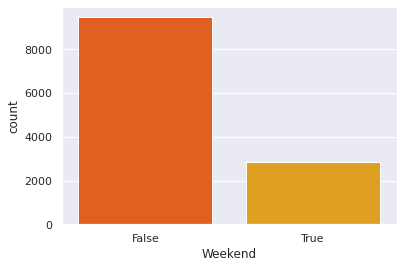

In [19]:
sns.set_theme(style="darkgrid")
sns.countplot(df['Weekend'],palette='autumn')
plt.show()

From the above observation we can say that very few people have visited the shopping website in the weekend

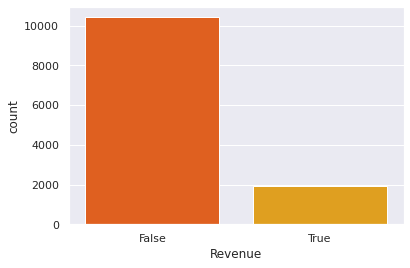

In [20]:
sns.set_theme(style="darkgrid")
sns.countplot(df['Revenue'],palette='autumn')
plt.show()

From the above observation there were many visitors in the shopping website but very few people have generated the revenue 

In [21]:
df.head()

Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0              0   
4               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                64.000000   
2                     0.0               1                 0.000000   
3                     0.0               2                 2.666667   
4                     0.0              10               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
0         0.20       0.20         0.0         0.0   Feb                 1   
1         0.00       0.10         0.0         0.0   Feb                 2   
2         0.20       0.20         0.0         0.0   Feb                 4   
3         0.05       0.14         0.0         0.0   Feb                 3   
4         0.02       0.05         0.0         0.0   Feb                 3   

   Browser  Region  TrafficType        VisitorType  Weekend  Revenue  
0        1       1            1  Returning_Visitor    False    False  
1        2       1            2  Returning_Visitor    False    False  
2        1       9            3  Returning_Visitor    False    False  
3        2       2            4  Returning_Visitor    False    False  
4        3       1            4  Returning_Visitor     True    False

In [23]:
df['OperatingSystems'].value_counts()

2    6601
1    2585
3    2555
4     478
8      79
6      19
7       7
5       6
Name: OperatingSystems, dtype: int64

In [22]:
a1=[2,1,3,4,8,6,7,5]
a2=[6601,2585,2555,478,79,19,7,6]

In [24]:
import plotly.express as px
fig = go.Figure(data=[go.Pie(labels=a1,
                             values=a2,title='Percentage of Diffrent OS Used by visitors')])
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

                       Most of visitors use OS of type 2 ,as we can observe from the above pie chart

In [25]:
df['Browser'].value_counts()

2     7961
1     2462
4      736
5      467
6      174
10     163
8      135
3      105
13      61
7       49
12      10
11       6
9        1
Name: Browser, dtype: int64

In [26]:
b1=[2,1,4,5,6,10,8,3,13,7,12,11,9]
b2=[7961,2462,736,467,174,163,135,105,61,49,10,6,6,1]

In [27]:
import plotly.express as px
fig = go.Figure(data=[go.Pie(labels=b1,
                             values=b2,title='Percentage of Diffrent Browsers Used by visitors')])
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

                     Most of the visitors use Browser of type 2,as we can observe from the above piechart

In [28]:
df['Region'].value_counts()

1    4780
3    2403
4    1182
2    1136
6     805
7     761
9     511
8     434
5     318
Name: Region, dtype: int64

In [29]:
c1=[1,3,4,2,6,7,9,8,5]
c2=[4780,2403,1182,1136,805,761,511,434,318]


In [30]:
import plotly.express as px
fig = go.Figure(data=[go.Pie(labels=c1,
                             values=c2,title='Percentage of Diffrent Regions  by visitors')])
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

               From the above pie chart we can say that most of the vistors are from region 1

In [31]:
df['TrafficType'].value_counts()

2     3913
1     2451
3     2052
4     1069
13     738
10     450
6      444
8      343
5      260
11     247
20     198
9       42
7       40
15      38
19      17
14      13
18      10
16       3
12       1
17       1
Name: TrafficType, dtype: int64

In [32]:
d1=[2,1,3,4,13,10,6,8,5,11,20,9,7,15,19,14,18,16,12,17]
d2=[3913,2451,2052,1069,738,450,444,343,260,247,198,42,40,38,17,13,10,3,1,1]

In [33]:
import plotly.express as px
fig = go.Figure(data=[go.Pie(labels=c1,
                             values=c2,title='Percentage of Diffrent Traffic Types by visitors')])
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

                       From the above observation we can say that most of users are from traffic type 1

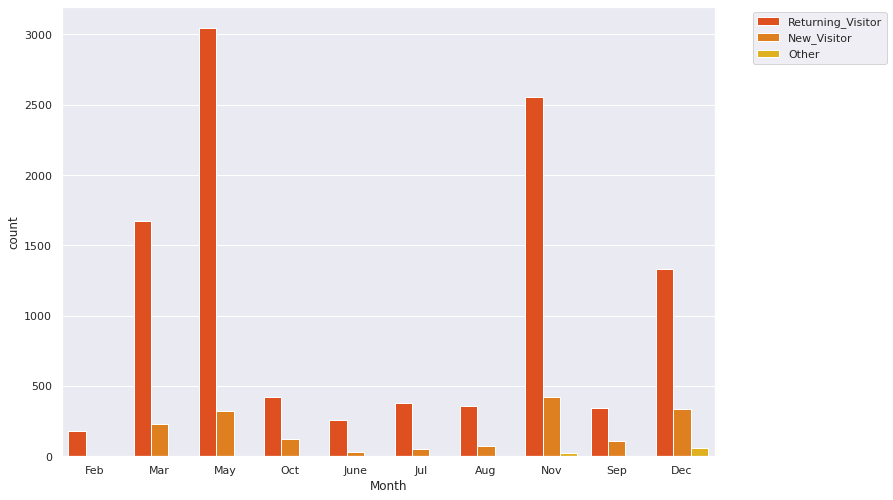

In [34]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_theme(style="darkgrid")
sns.countplot(df['Month'],hue=df['VisitorType'],palette='autumn')
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()

1)Most of the Returning visitors are from the month may

2)Most of the New Visitors are from the month november 

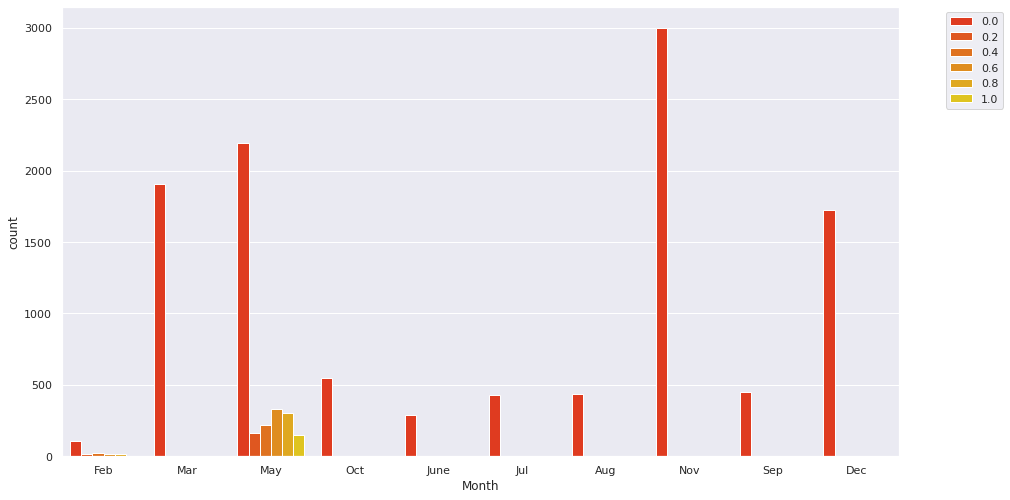

In [35]:
sns.set(rc={'figure.figsize':(15,8.27)})
sns.set_theme(style="darkgrid")
sns.countplot(df['Month'],hue=df['SpecialDay'],palette='autumn')
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()

1)There are no special days between Aug and Nov

2)There are many special Days in the month of may

3)There are very few special days in the month of oct

## Distribution Plots

<AxesSubplot:xlabel='Administrative', ylabel='Density'>

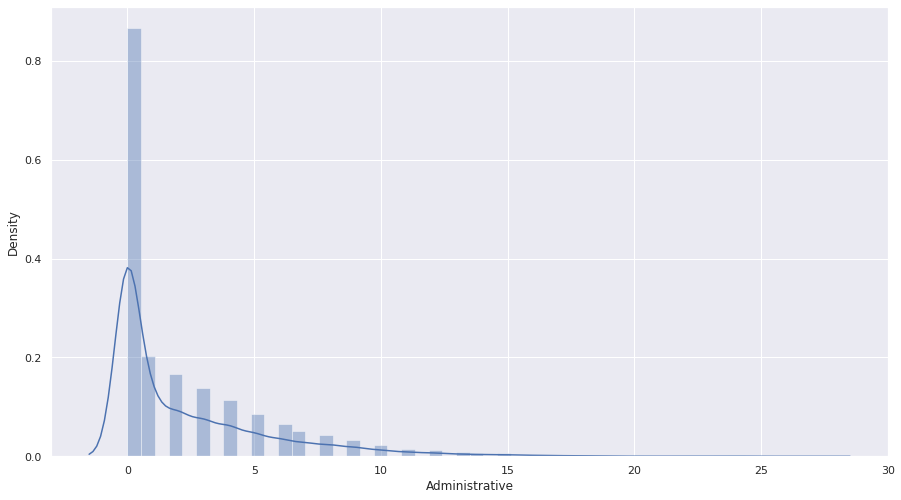

In [36]:
sns.set(rc={'figure.figsize':(15,8.27)})
sns.set_theme(style="darkgrid")
sns.distplot(df['Administrative'])

<AxesSubplot:xlabel='Administrative_Duration', ylabel='Density'>

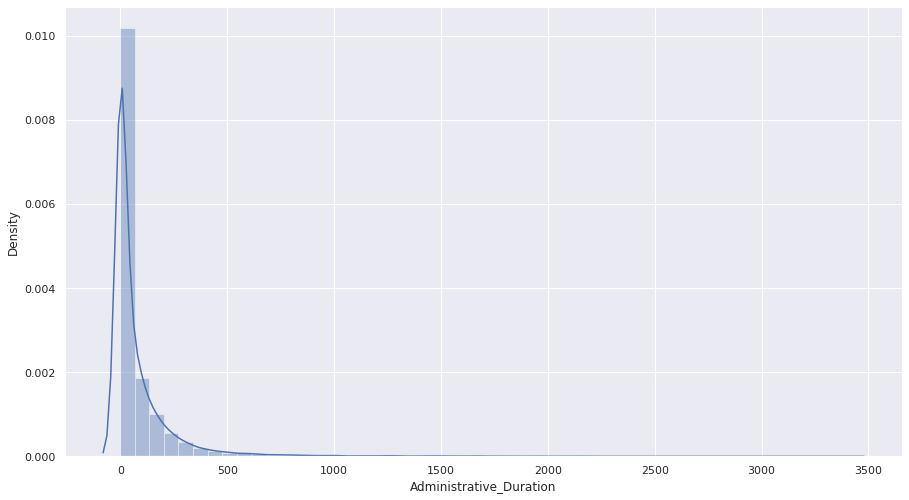

In [37]:
sns.set(rc={'figure.figsize':(15,8.27)})
sns.set_theme(style="darkgrid")
sns.distplot(df['Administrative_Duration'])

<AxesSubplot:xlabel='Informational', ylabel='Density'>

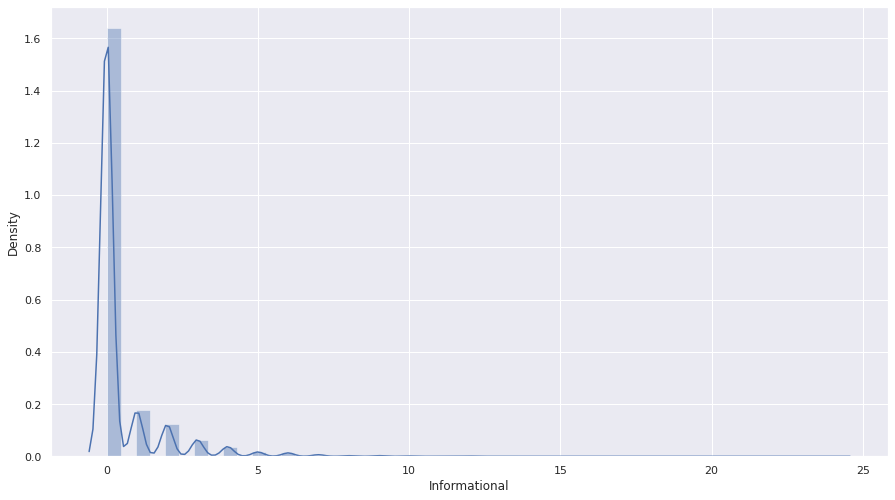

In [38]:
sns.set(rc={'figure.figsize':(15,8.27)})
sns.set_theme(style="darkgrid")
sns.distplot(df['Informational'])

<AxesSubplot:xlabel='Informational_Duration', ylabel='Density'>

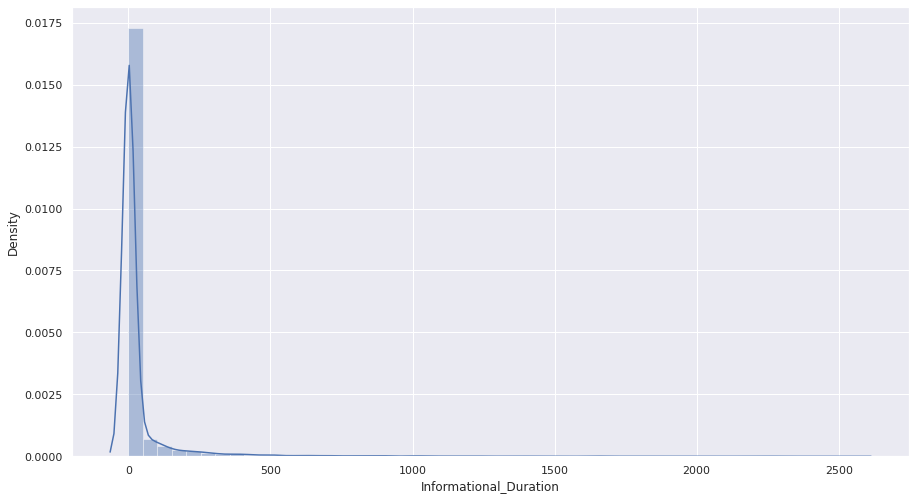

In [39]:
sns.set(rc={'figure.figsize':(15,8.27)})
sns.set_theme(style="darkgrid")
sns.distplot(df['Informational_Duration'])

<AxesSubplot:xlabel='ProductRelated', ylabel='Density'>

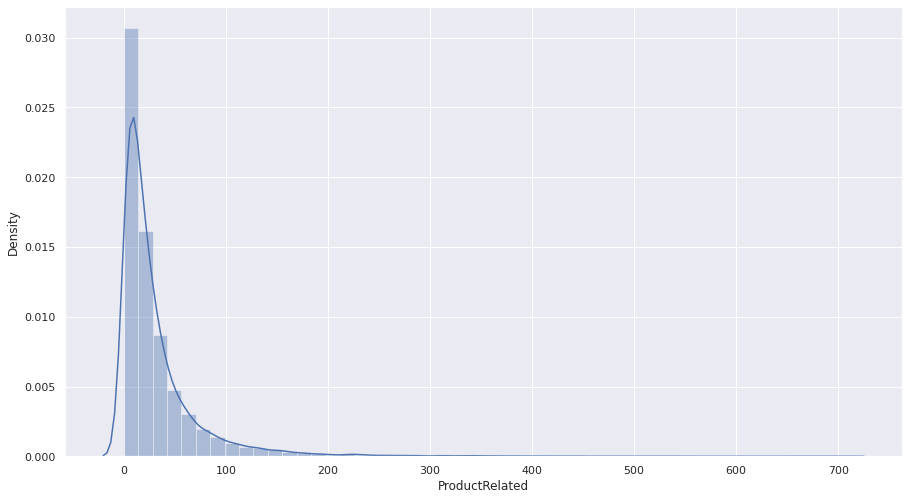

In [40]:
sns.set(rc={'figure.figsize':(15,8.27)})
sns.set_theme(style="darkgrid")
sns.distplot(df['ProductRelated'])

<AxesSubplot:xlabel='ProductRelated_Duration', ylabel='Density'>

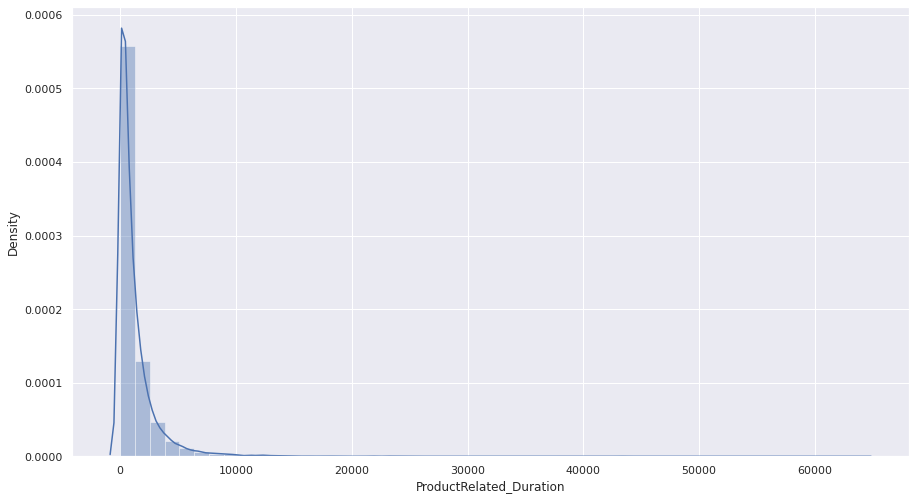

In [41]:
sns.set(rc={'figure.figsize':(15,8.27)})
sns.set_theme(style="darkgrid")
sns.distplot(df['ProductRelated_Duration'])

<AxesSubplot:xlabel='BounceRates', ylabel='Density'>

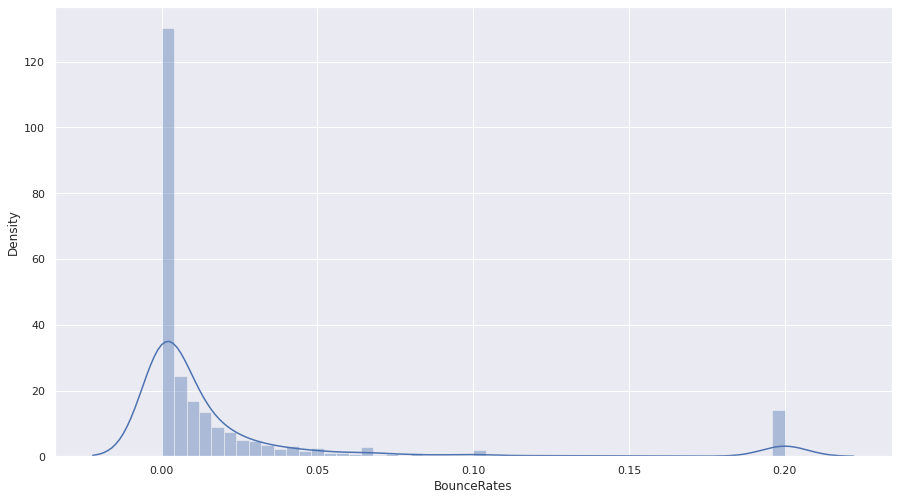

In [42]:
sns.set(rc={'figure.figsize':(15,8.27)})
sns.set_theme(style="darkgrid")
sns.distplot(df['BounceRates'])


<AxesSubplot:xlabel='ExitRates', ylabel='Density'>

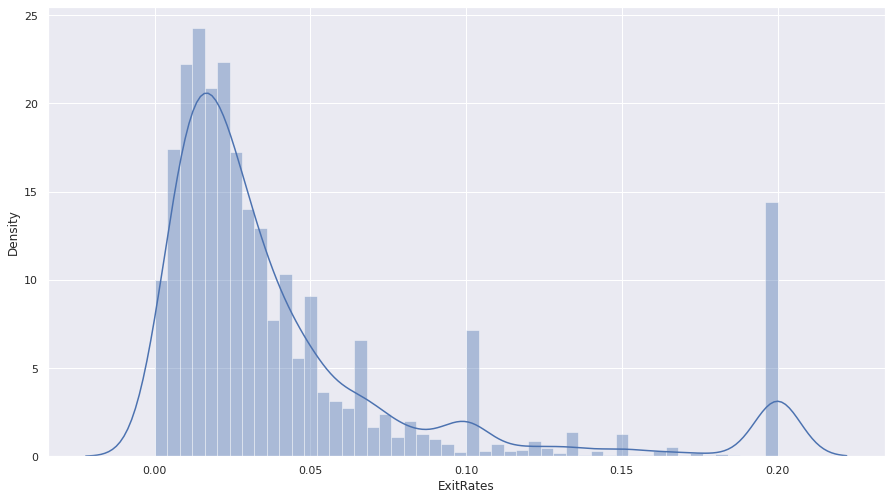

In [43]:
sns.set(rc={'figure.figsize':(15,8.27)})
sns.set_theme(style="darkgrid")
sns.distplot(df['ExitRates'])


<AxesSubplot:xlabel='PageValues', ylabel='Density'>

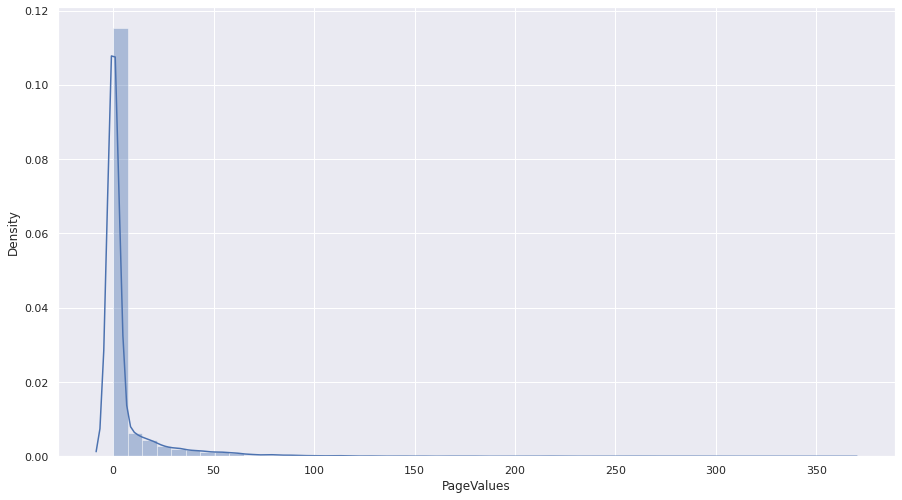

In [44]:
sns.set(rc={'figure.figsize':(15,8.27)})
sns.set_theme(style="darkgrid")
sns.distplot(df['PageValues'])


In [45]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

df2=df.select_dtypes(include=numerics)

## Box Plot

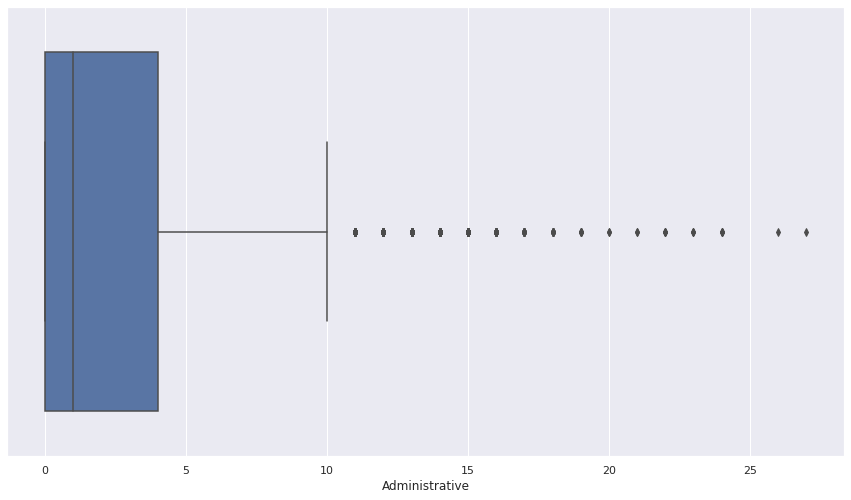

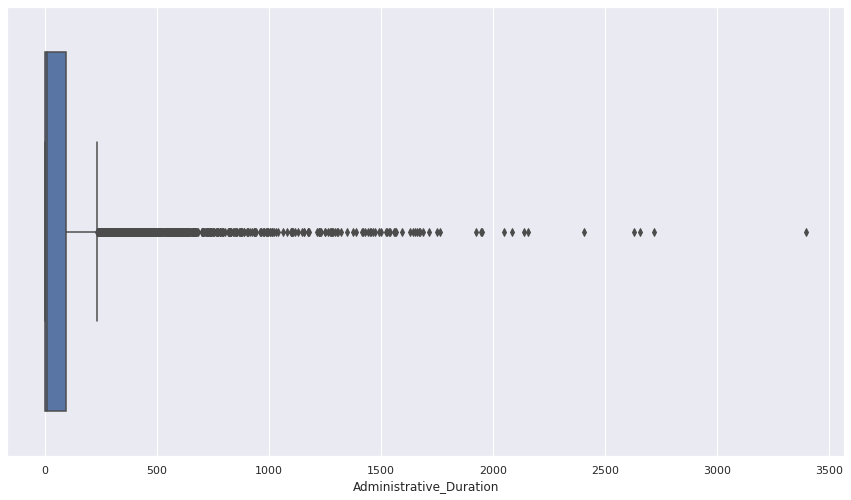

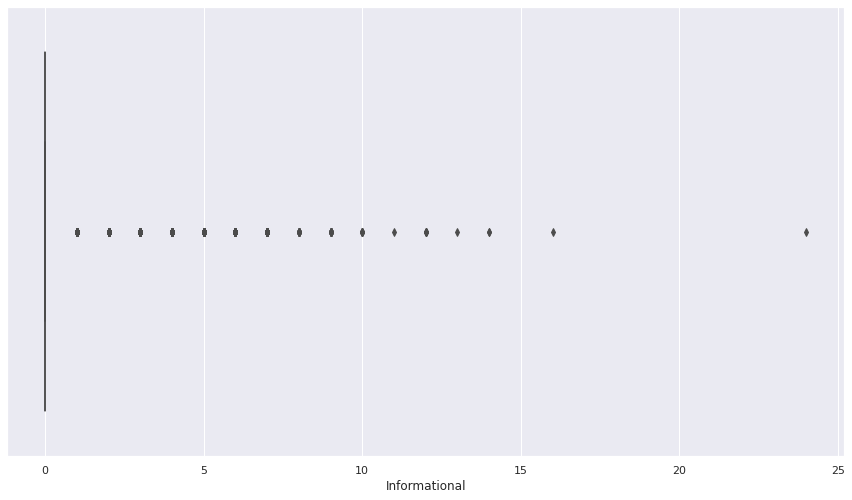

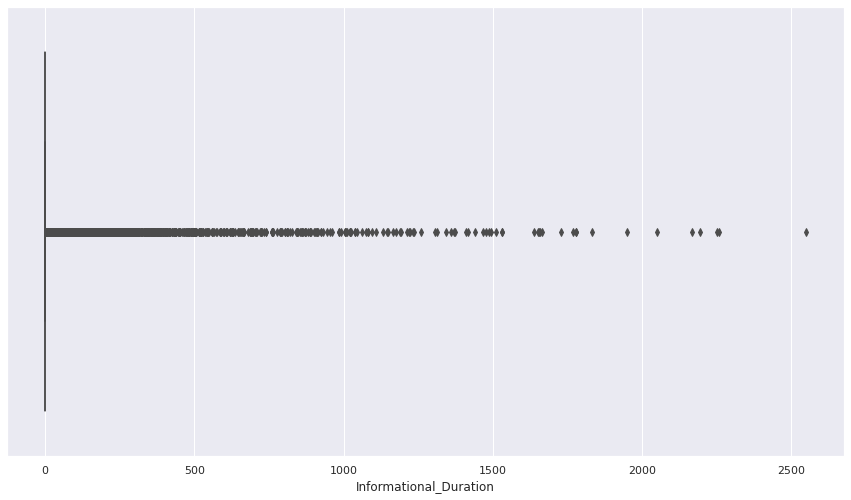

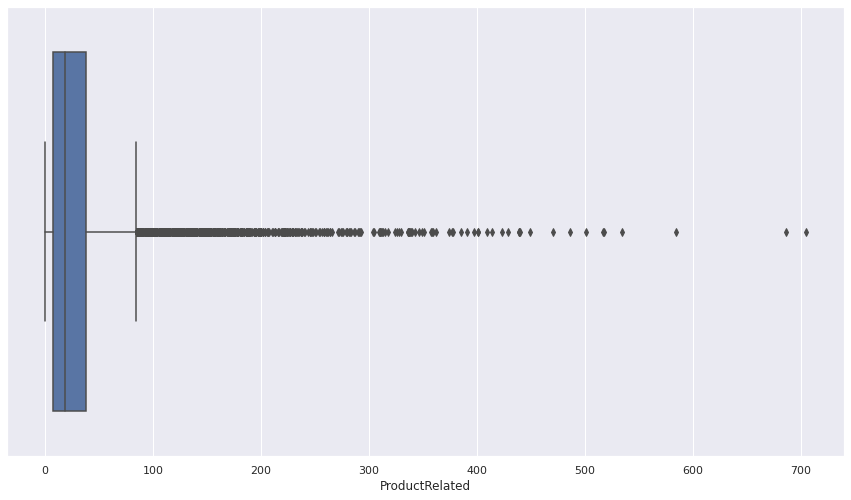

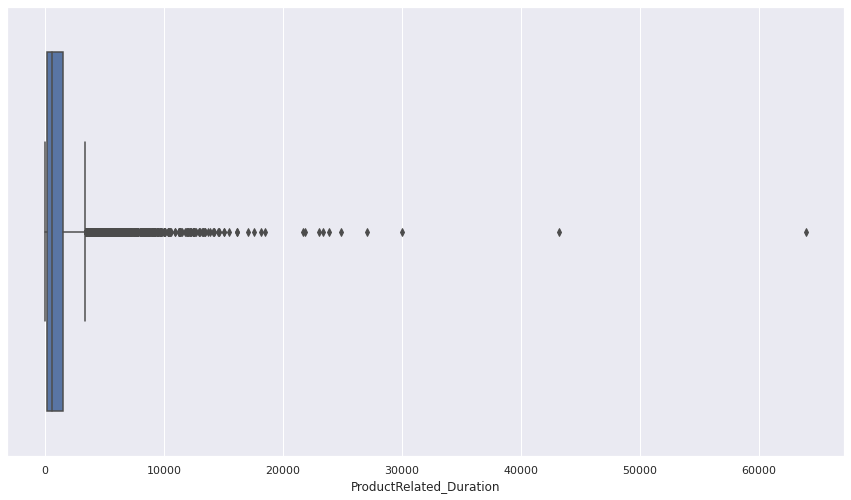

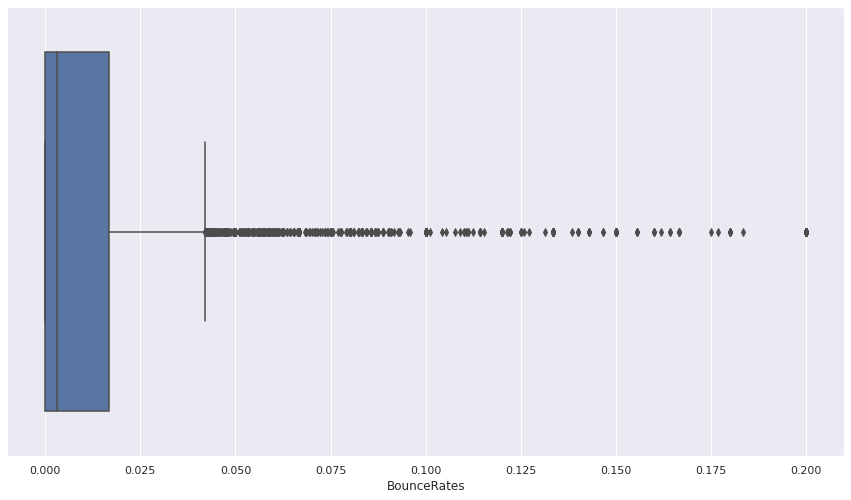

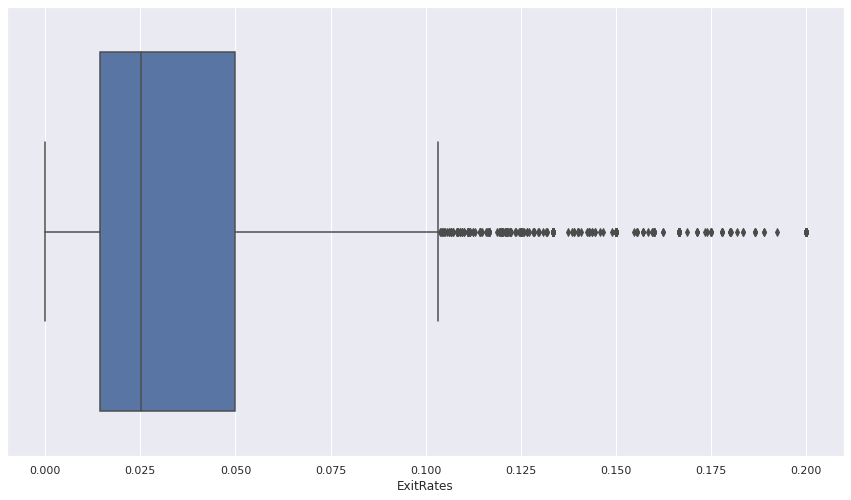

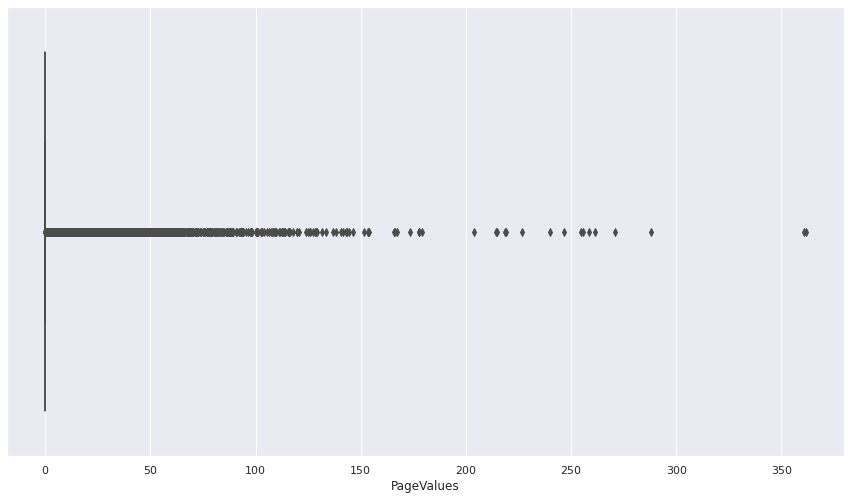

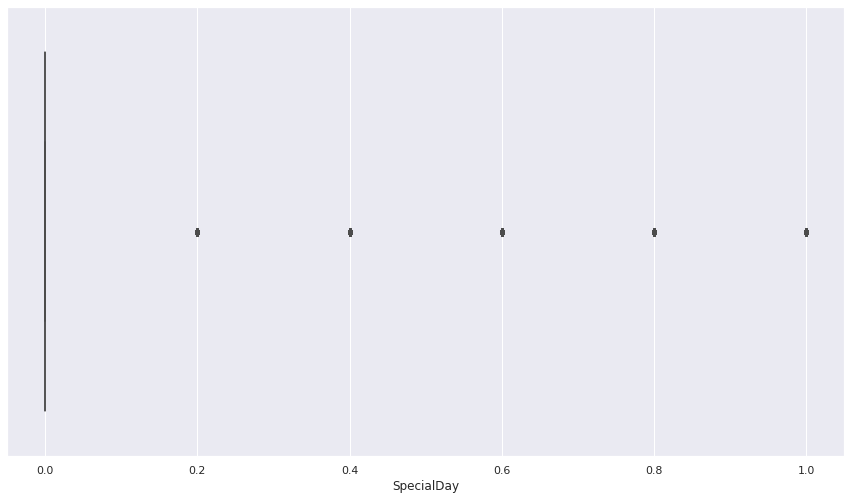

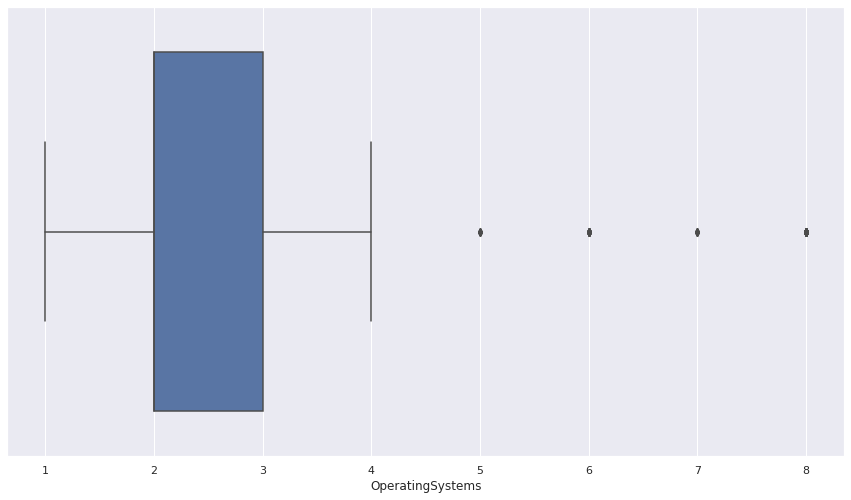

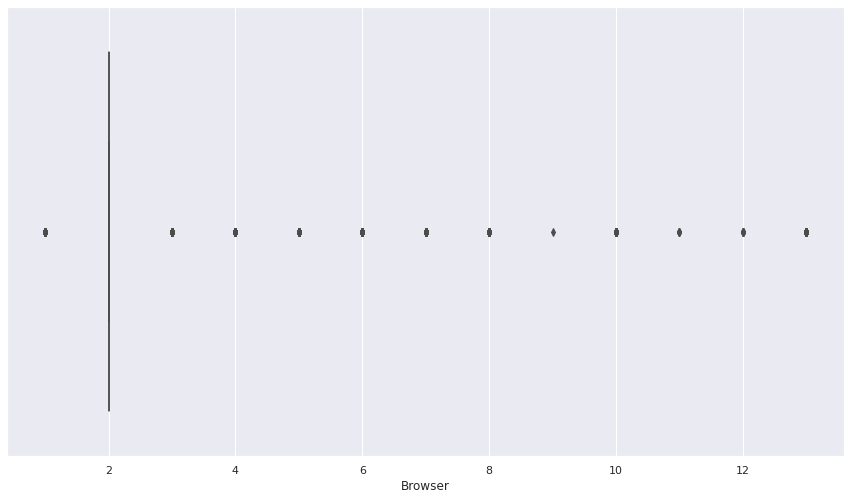

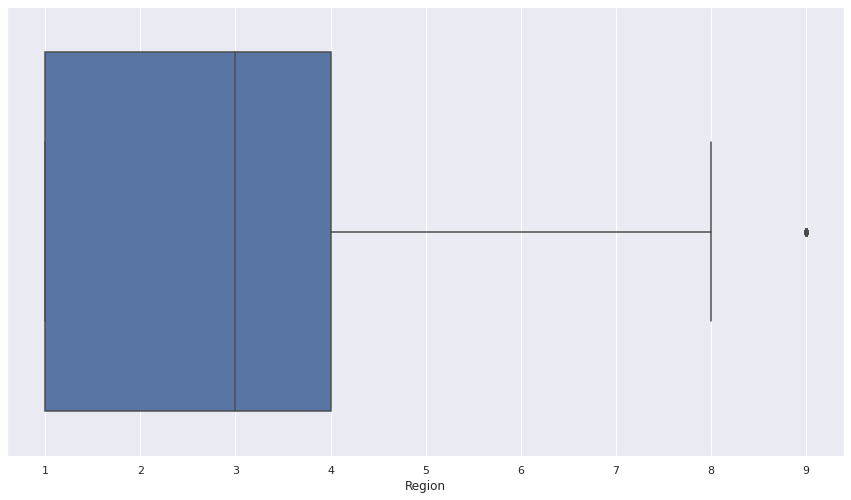

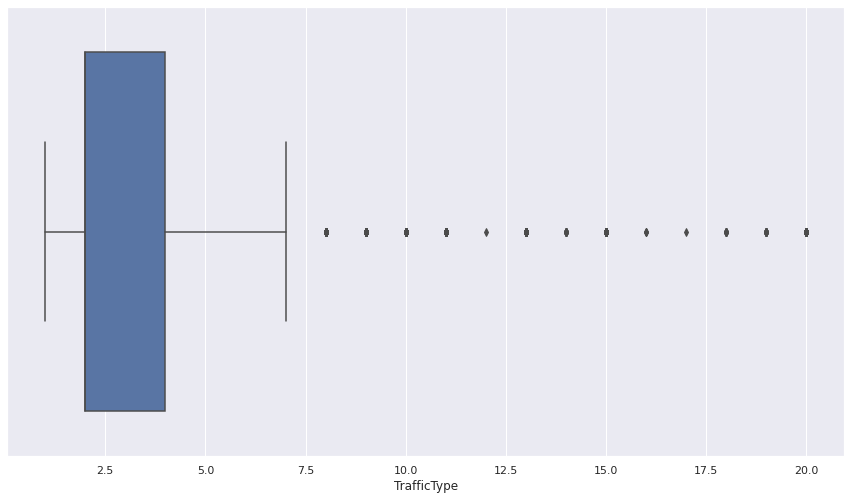

In [46]:
sns.set(rc={'figure.figsize':(15,8.27)})
sns.set_theme(style="darkgrid")
for i in df2.columns:
    sns.boxplot(df[i])
    plt.show()

## Heat Map

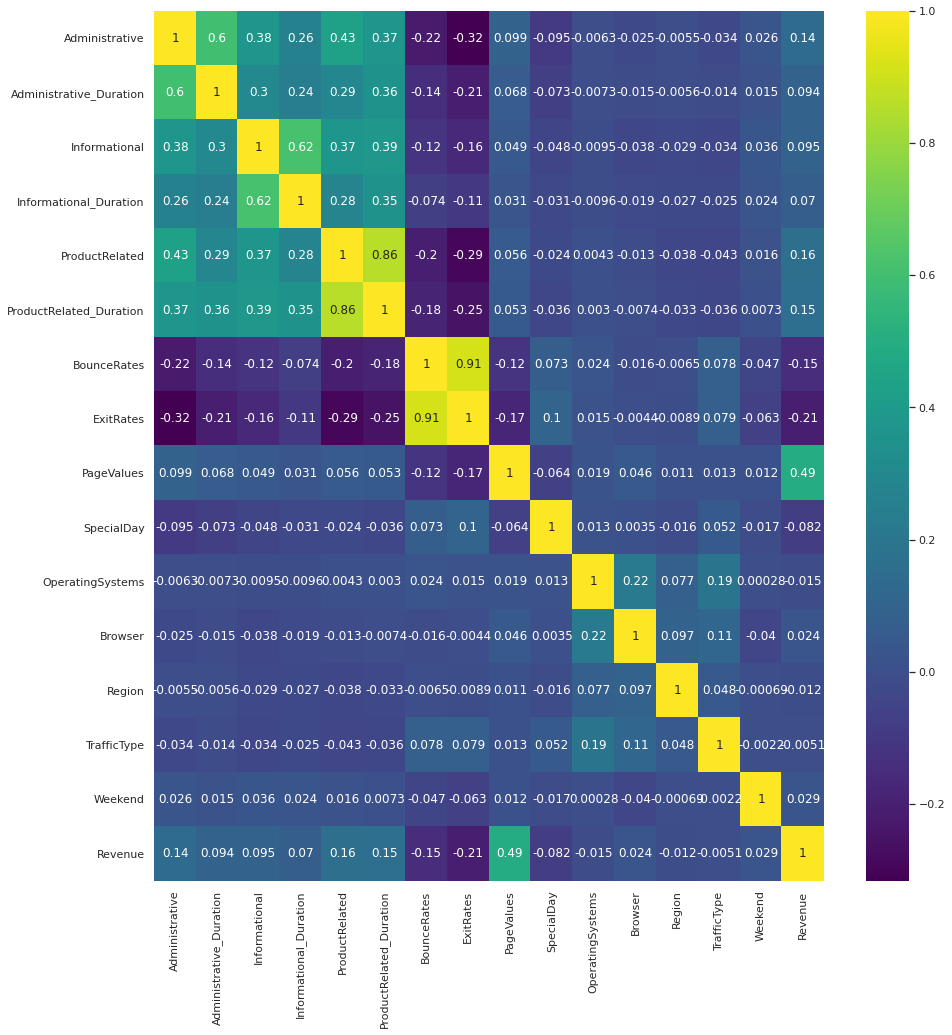

In [47]:
plt.figure(figsize=(15,16))
ax = sns.heatmap(df.corr(),annot = True, cmap = 'viridis')
plt.show()


# Data Preproccessing

In [48]:
def count_outliers(data,col):
        q1 = data[col].quantile(0.25,interpolation='nearest')
        q2 = data[col].quantile(0.5,interpolation='nearest')
        q3 = data[col].quantile(0.75,interpolation='nearest')
        q4 = data[col].quantile(1,interpolation='nearest')
        IQR = q3 -q1
        global LLP
        global ULP
        LLP = q1 - 1.5*IQR
        ULP = q3 + 1.5*IQR
        if data[col].min() > LLP and data[col].max() < ULP:
            print("No outliers in",i)
        else:
            print("There are outliers in",i)
            x = data[data[col]<LLP][col].size
            y = data[data[col]>ULP][col].size
            a.append(i)
            print('Count of outliers are:',x+y)
global a
a = []
for i in df2.columns:
    count_outliers(df,i)

There are outliers in Administrative
Count of outliers are: 404
There are outliers in Administrative_Duration
Count of outliers are: 1171
There are outliers in Informational
Count of outliers are: 2631
There are outliers in Informational_Duration
Count of outliers are: 2405
There are outliers in ProductRelated
Count of outliers are: 987
There are outliers in ProductRelated_Duration
Count of outliers are: 961
There are outliers in BounceRates
Count of outliers are: 1551
There are outliers in ExitRates
Count of outliers are: 1099
There are outliers in PageValues
Count of outliers are: 2730
There are outliers in SpecialDay
Count of outliers are: 1251
There are outliers in OperatingSystems
Count of outliers are: 111
There are outliers in Browser
Count of outliers are: 4369
There are outliers in Region
Count of outliers are: 511
There are outliers in TrafficType
Count of outliers are: 2101


In [49]:
def LABEL_ENCODING(c1):
    from sklearn import preprocessing
    # label_encoder object knows how to understand word labels.
    label_encoder = preprocessing.LabelEncoder()
 
    # Encode labels in column 'species'.
    df[c1]= label_encoder.fit_transform(df[c1])
 
    df[c1].unique()
    return df

In [50]:
LABEL_ENCODING('Revenue')

Administrative  Administrative_Duration  Informational  \
0                   0                      0.0              0   
1                   0                      0.0              0   
2                   0                      0.0              0   
3                   0                      0.0              0   
4                   0                      0.0              0   
...               ...                      ...            ...   
12325               3                    145.0              0   
12326               0                      0.0              0   
12327               0                      0.0              0   
12328               4                     75.0              0   
12329               0                      0.0              0   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                         0.0               1                 0.000000   
1                         0.0               2                64.000000   
2                         0.0               1                 0.000000   
3                         0.0               2                 2.666667   
4                         0.0              10               627.500000   
...                       ...             ...                      ...   
12325                     0.0              53              1783.791667   
12326                     0.0               5               465.750000   
12327                     0.0               6               184.250000   
12328                     0.0              15               346.000000   
12329                     0.0               3                21.250000   

       BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
0         0.200000   0.200000    0.000000         0.0   Feb                 1   
1         0.000000   0.100000    0.000000         0.0   Feb                 2   
2         0.200000   0.200000    0.000000         0.0   Feb                 4   
3         0.050000   0.140000    0.000000         0.0   Feb                 3   
4         0.020000   0.050000    0.000000         0.0   Feb                 3   
...            ...        ...         ...         ...   ...               ...   
12325     0.007143   0.029031   12.241717         0.0   Dec                 4   
12326     0.000000   0.021333    0.000000         0.0   Nov                 3   
12327     0.083333   0.086667    0.000000         0.0   Nov                 3   
12328     0.000000   0.021053    0.000000         0.0   Nov                 2   
12329     0.000000   0.066667    0.000000         0.0   Nov                 3   

       Browser  Region  TrafficType        VisitorType  Weekend  Revenue  
0            1       1            1  Returning_Visitor    False        0  
1            2       1            2  Returning_Visitor    False        0  
2            1       9            3  Returning_Visitor    False        0  
3            2       2            4  Returning_Visitor    False        0  
4            3       1            4  Returning_Visitor     True        0  
...        ...     ...          ...                ...      ...      ...  
12325        6       1            1  Returning_Visitor     True        0  
12326        2       1            8  Returning_Visitor     True        0  
12327        2       1           13  Returning_Visitor     True        0  
12328        2       3           11  Returning_Visitor    False        0  
12329        2       1            2        New_Visitor     True        0  

[12330 rows x 18 columns]

In [51]:
df= pd.get_dummies(df, columns = ['Month', 'Weekend','VisitorType'])

In [52]:
df

Administrative  Administrative_Duration  Informational  \
0                   0                      0.0              0   
1                   0                      0.0              0   
2                   0                      0.0              0   
3                   0                      0.0              0   
4                   0                      0.0              0   
...               ...                      ...            ...   
12325               3                    145.0              0   
12326               0                      0.0              0   
12327               0                      0.0              0   
12328               4                     75.0              0   
12329               0                      0.0              0   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                         0.0               1                 0.000000   
1                         0.0               2                64.000000   
2                         0.0               1                 0.000000   
3                         0.0               2                 2.666667   
4                         0.0              10               627.500000   
...                       ...             ...                      ...   
12325                     0.0              53              1783.791667   
12326                     0.0               5               465.750000   
12327                     0.0               6               184.250000   
12328                     0.0              15               346.000000   
12329                     0.0               3                21.250000   

       BounceRates  ExitRates  PageValues  SpecialDay  ...  Month_Mar  \
0         0.200000   0.200000    0.000000         0.0  ...          0   
1         0.000000   0.100000    0.000000         0.0  ...          0   
2         0.200000   0.200000    0.000000         0.0  ...          0   
3         0.050000   0.140000    0.000000         0.0  ...          0   
4         0.020000   0.050000    0.000000         0.0  ...          0   
...            ...        ...         ...         ...  ...        ...   
12325     0.007143   0.029031   12.241717         0.0  ...          0   
12326     0.000000   0.021333    0.000000         0.0  ...          0   
12327     0.083333   0.086667    0.000000         0.0  ...          0   
12328     0.000000   0.021053    0.000000         0.0  ...          0   
12329     0.000000   0.066667    0.000000         0.0  ...          0   

       Month_May  Month_Nov  Month_Oct  Month_Sep  Weekend_False  \
0              0          0          0          0              1   
1              0          0          0          0              1   
2              0          0          0          0              1   
3              0          0          0          0              1   
4              0          0          0          0              0   
...          ...        ...        ...        ...            ...   
12325          0          0          0          0              0   
12326          0          1          0          0              0   
12327          0          1          0          0              0   
12328          0          1          0          0              1   
12329          0          1          0          0              0   

       Weekend_True  VisitorType_New_Visitor  VisitorType_Other  \
0                 0                        0                  0   
1                 0                        0                  0   
2                 0                        0                  0   
3                 0                        0                  0   
4                 1                        0                  0   
...             ...                      ...                ...   
12325             1                        0                  0   
12326             1                        0                  0   
12327             1                     

# Feature Engineering

In [53]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df)

StandardScaler()

In [54]:
feature=df.drop('Revenue',axis=1)

In [55]:
label=df['Revenue']

In [56]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(feature,label,test_size=.3)

In [57]:
print(X_train.shape,y_train.shape)

(8631, 29) (8631,)


In [58]:
print(X_test.shape,y_test.shape)

(3699, 29) (3699,)


# Data Modelling

In [59]:
D_train = xgb.DMatrix(data=X_train, label=y_train)
D_test = xgb.DMatrix(data=X_test, label=y_test)

In [60]:
param = {
    'eta': 0.3, 
    'max_depth': 3,  
    'objective': 'multi:softprob',  
    'num_class': 3} 

steps = 20  # The number of training iterations

In [61]:
model = xgb.train(param, D_train, steps)

[23:41:16] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [62]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, accuracy_score

preds = model.predict(D_test)
best_preds = np.asarray([np.argmax(line) for line in preds])

print("Precision = {}".format(precision_score(y_test, best_preds, average='macro')))
print("Recall = {}".format(recall_score(y_test, best_preds, average='macro')))
print("Accuracy = {}".format(accuracy_score(y_test, best_preds)))

Precision = 0.8306805804434138
Recall = 0.7766840444505418
Accuracy = 0.9010543390105434


# Clustering


In [63]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [64]:
pca = PCA(2)

In [65]:
df3=pca.fit_transform(df)

In [66]:
df3.shape

(12330, 2)

In [67]:
kmeans = KMeans(3)
kmeans.fit(df3)


KMeans(n_clusters=3)

In [68]:
identified_clusters = kmeans.fit_predict(df3)
identified_clusters

array([2, 2, 2, ..., 2, 2, 2], dtype=int32)

In [69]:
filter_label=df[identified_clusters==0]

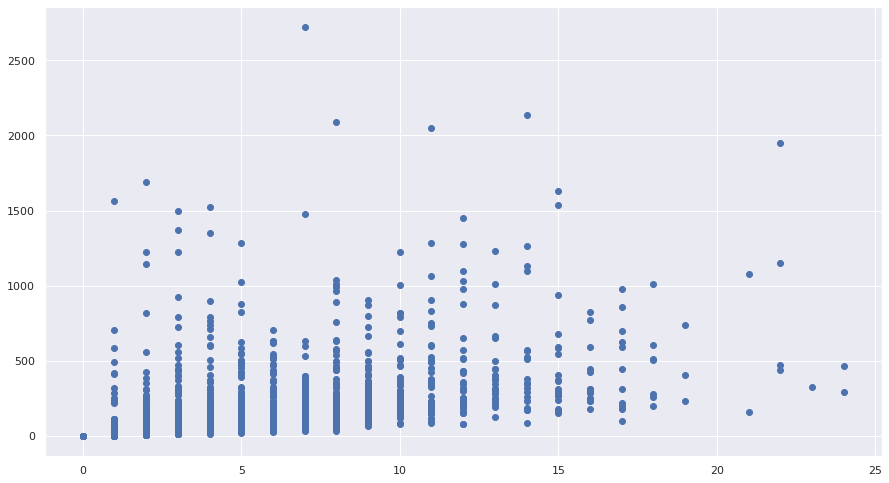

In [70]:
plt.scatter(filter_label.iloc[:,0] , filter_label.iloc[:,1])
plt.show()

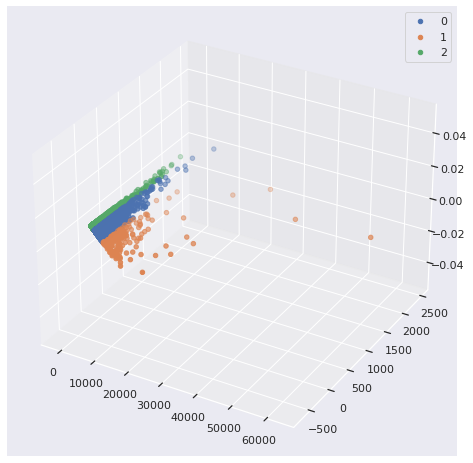

In [71]:
#Getting unique labels
 
u_labels = np.unique(identified_clusters)
 
#plotting the results:
ax = plt.subplot(111, projection='3d', label="bla")
 
for i in u_labels:
    ax.scatter(df3[identified_clusters == i , 0] , df3[identified_clusters == i,1] , label = i)
plt.legend()
plt.show()